# Missing data imputation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('./data/AirQualityUCI/AirQualityUCI_1.csv',parse_dates=['date'],index_col=['date'])
df = data.copy()
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
date,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593
2004-01-04 01:00:00,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652
2004-01-04 02:00:00,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630
2004-01-04 03:00:00,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299


## 시각화(visualization)

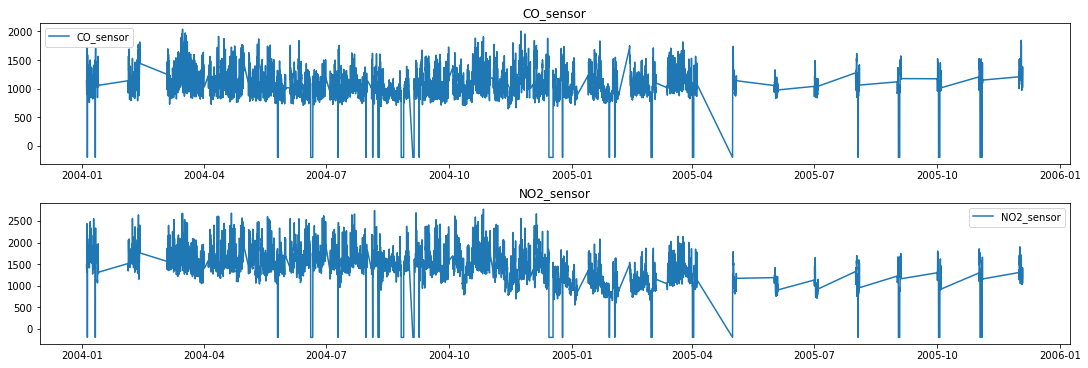

In [31]:
fig, axs = plt.subplots(nrows=2, figsize=(15,5), constrained_layout=True)
axs[0].plot(df.index, df['CO_sensor'], label='CO_sensor')
axs[0].set_title('CO_sensor')
axs[0].legend()

axs[1].plot(df.index, df['NO2_sensor'], label='NO2_sensor')
axs[1].set_title('NO2_sensor')
axs[1].legend()


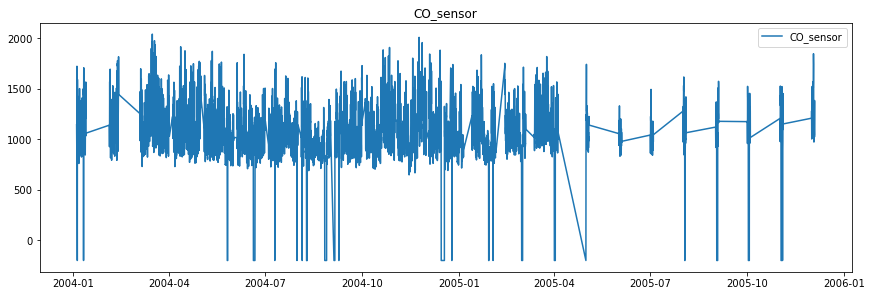

In [32]:
# CO_sensor 데이터 사용
fig, axs = plt.subplots(figsize=(12,4), constrained_layout=True)
axs.plot(df.index, df['CO_sensor'], label='CO_sensor')
axs.set_title('CO_sensor')
axs.legend()

In [33]:
df.index.min()

Timestamp('2004-01-04 00:00:00')

In [34]:
df.index.max()

Timestamp('2005-12-03 23:00:00')

## Missing data 살펴보기 

<AxesSubplot:xlabel='date'>

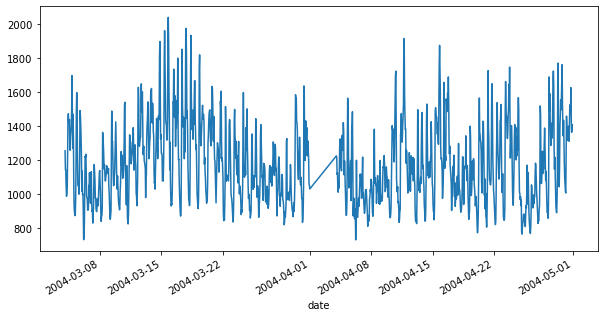

In [35]:
df['CO_sensor'].loc['2004-03':'2004-04'].plot(figsize=(10,5))

In [46]:
# 3월달 3월 4일부터 데이터 시작
df['CO_sensor'].loc['2004-03':'2004-04'].index[:10]

DatetimeIndex(['2004-03-04 00:00:00', '2004-03-04 01:00:00',
               '2004-03-04 02:00:00', '2004-03-04 03:00:00',
               '2004-03-04 04:00:00', '2004-03-04 05:00:00',
               '2004-03-04 06:00:00', '2004-03-04 07:00:00',
               '2004-03-04 08:00:00', '2004-03-04 09:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)

<AxesSubplot:xlabel='date'>

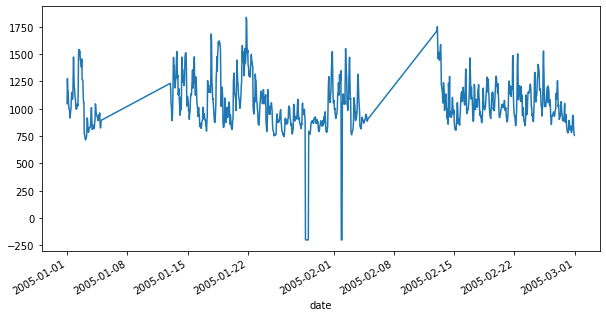

In [36]:
df['CO_sensor'].loc['2005-01':'2005-02'].plot(figsize=(10,5))

<AxesSubplot:xlabel='date'>

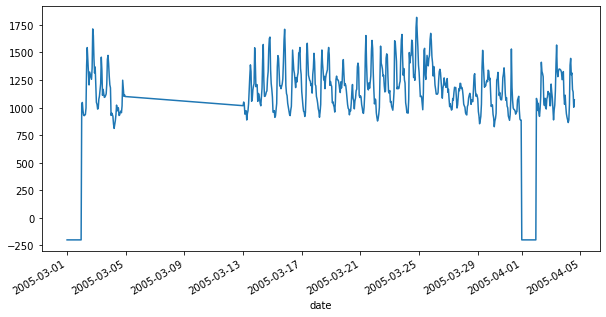

In [37]:
df['CO_sensor'].loc['2005-03':'2005-04'].plot(figsize=(10,5))

## 기간 설정 (1년)

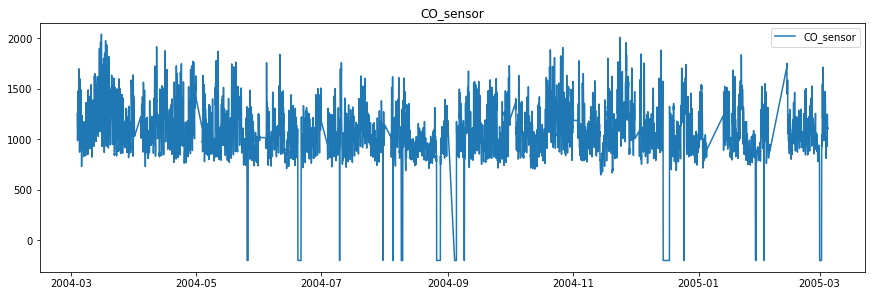

In [49]:
# CO_sensor 데이터 사용
df_1y = data.loc["2004-03-04":"2005-03-04"]
fig, axs = plt.subplots(figsize=(12,4), constrained_layout=True)
axs.plot(df_.index, df_1y['CO_sensor'], label='CO_sensor')
axs.set_title('CO_sensor')
axs.legend()

In [50]:
df_1y.index.min()

Timestamp('2004-03-04 00:00:00')

In [51]:
df_1y.index.max()

Timestamp('2005-03-04 23:00:00')

# Imputation

In [47]:
# Missing values are tagged with -200 value.
# 1년 + 음수 데이터 제외
df = data.loc["2004-03-04":"2005-03-04"].copy()
df = df[df['CO_sensor']>0]
df.head()

,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOx_true,NOx_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
date,,,,,,,,,,,,,
2004-03-04 00:00:00,1.6,1254.0,139.0,9.0,941.0,98.0,828.0,106.0,1566.0,1270.0,17.1,51.8,0.9990
2004-03-04 01:00:00,1.3,1141.0,98.0,6.3,827.0,73.0,936.0,88.0,1488.0,1110.0,16.2,54.2,0.9933
2004-03-04 02:00:00,1.2,1141.0,88.0,5.3,777.0,69.0,986.0,83.0,1455.0,1060.0,15.1,58.2,0.9886
2004-03-04 03:00:00,0.9,1042.0,66.0,3.8,697.0,-200.0,1056.0,-200.0,1410.0,965.0,15.1,57.6,0.9796
2004-03-04 04:00:00,0.8,986.0,57.0,3.0,651.0,60.0,1145.0,74.0,1380.0,891.0,14.5,58.0,0.9488


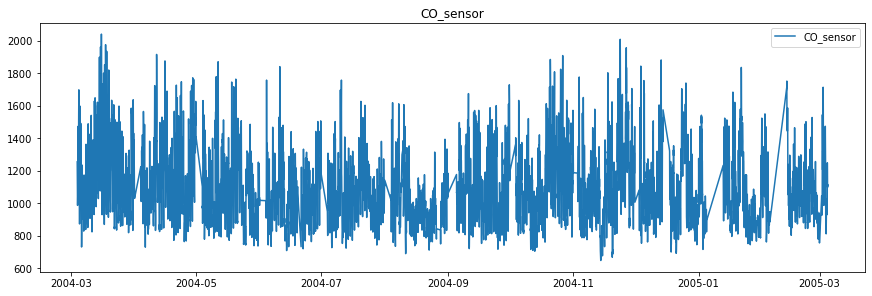

In [48]:
# CO_sensor 음수 제거 
fig, axs = plt.subplots(figsize=(12,4), constrained_layout=True)
axs.plot(df.index, df['CO_sensor'], label='CO_sensor')
axs.set_title('CO_sensor')
axs.legend()

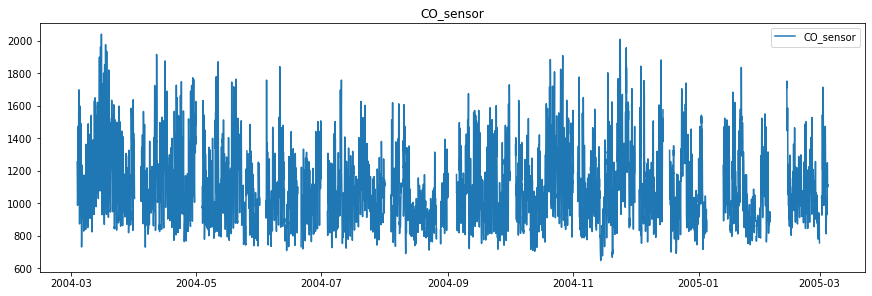

In [57]:
# 1시간 간격으로 맞추기
df_ = df.asfreq("1H")
 
fig, axs = plt.subplots(figsize=(12,4), constrained_layout=True)
axs.plot(df_.index, df_['CO_sensor'], label='CO_sensor')
axs.set_title('CO_sensor')
axs.legend()

## ffill

In [65]:
df_ff = df_.fillna(method='ffill')

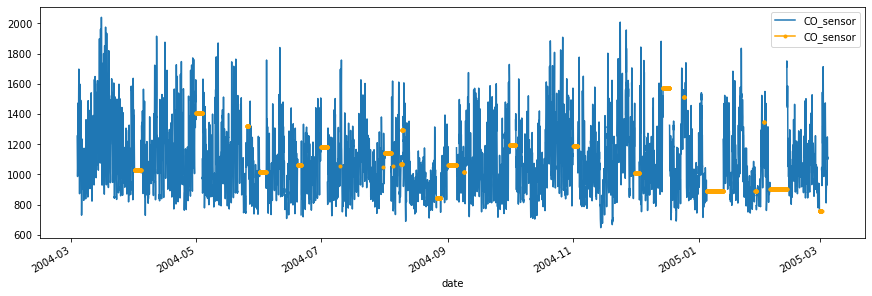

In [66]:
fig, ax = plt.subplots(figsize=(12,4),constrained_layout=True)

ax.plot(df_.index, df_['CO_sensor'], label="CO_sensor")
df_ff[df_.isnull()]['CO_sensor'].plot(ax=ax, legend=None, marker='.', color='orange')

ax.legend()

## linear

In [55]:
df_linear = df_.interpolate(method='linear')

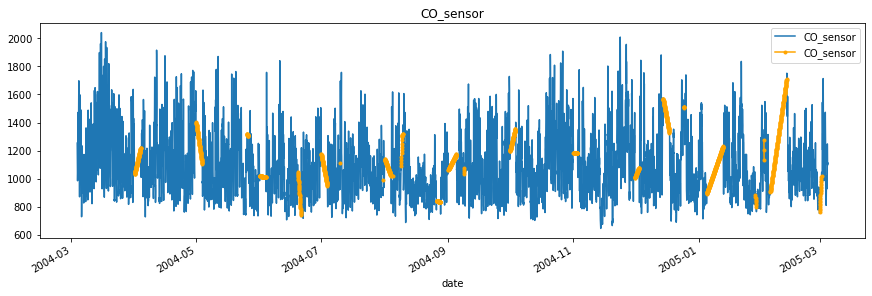

In [59]:
# 채운 데이터 시각화
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.plot(df_.index, df_['CO_sensor'], label='CO_sensor')

# interpolate
df_linear[df_.isnull()]['CO_sensor'].plot(ax=ax, legend=None, marker='.',color='orange')
ax.set_title('CO_sensor')
ax.legend()

## spline

In [62]:
# 2차
# 시간 오래걸림
df_spline = df_.interpolate(method='spline', order=2)

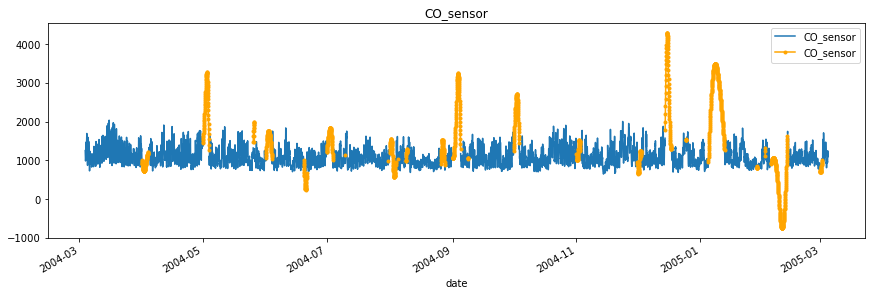

In [63]:
# 채운 데이터 시각화
# 성능 안좋음
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)

ax.plot(df_.index, df_['CO_sensor'], label='CO_sensor')

# interpolate
df_spline[df_.isnull()]['CO_sensor'].plot(ax=ax, legend=None, marker='.',color='orange')
ax.set_title('CO_sensor')
ax.legend()

In [69]:
## result
# EDA를 하기 전까지 계절성이 있는지 확실하지 않기 때문에 
# ffill 로 채우는 방법이 가장 합리적